In [18]:

!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp311-cp311-macosx_11_0_arm64.whl size=1100060 sha256=421665065dd41a03aa1f5454b6a6dc0cb6701b35690d7adfc884a8d3e4bcf444
  Stored in directory: /Users/hitteshkumarm/Library/Caches/pip/wheels/f4/2b/26/e2a5eae55d3b7688995e66abe7f40473aac6c95ddd8ee174a8
Successfully built scikit-surprise


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from surprise import SVD
import matplotlib.pyplot as plt
from surprise import accuracy
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader

In [2]:
df = pd.read_csv(r"/Users/hitteshkumarm/Desktop/COLLEGE/PROJECTS/MOVIE RECOMMENDATION SYSTEM/movies.csv")
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [3]:
df.shape

(10329, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [5]:
df.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [6]:
df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [7]:
df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

<Axes: >

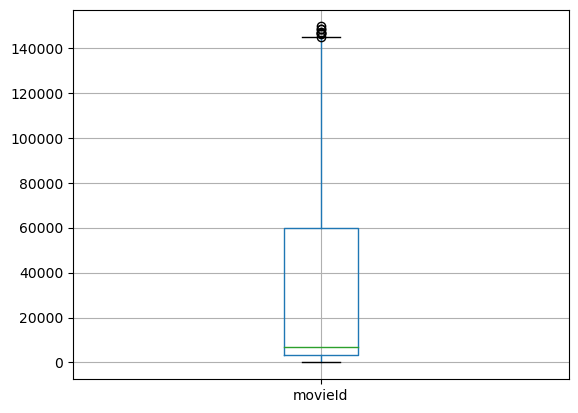

In [8]:
df.boxplot()

In [9]:
df = df.dropna() 
df = df.drop_duplicates()

In [10]:
df = df.fillna(0)

In [11]:
df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [12]:
user_item_matrix = df.pivot(index='movieId', columns='title', values='genres')

In [14]:
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['genres', 'title', 'movieId']], reader)

# Split the Surprise dataset into a trainset and testset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [15]:
algo = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
algo.fit(trainset)
print("Model trained successfully!")

Model trained successfully!


In [16]:
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

RMSE: 49981.2745
Root Mean Squared Error (RMSE): 49981.2745412002


In [17]:
user_id = 1
user_data = df[df['movieId'] == user_id]
user_rated_movie_ids = set(user_data['movieId'])

In [18]:
all_movie_ids = set(df['movieId'])
unrated_movie_ids = all_movie_ids - user_rated_movie_ids

In [19]:
unrated_movie_predictions = [(user_id, movie_id, algo.predict(user_id, movie_id).est) for movie_id in unrated_movie_ids]

In [20]:
N = 10
top_n_recommendations = sorted(unrated_movie_predictions, key=lambda x: x[2], reverse=True)[:N]

In [21]:
print("Top Movie Recommendations:")
for _, movie_id, predicted_rating in top_n_recommendations:
    movie_title = df[df['movieId'] == movie_id]['title'].values[0]
    print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating}")

Top Movie Recommendations:
Movie: So Big! (1932), Predicted Rating: 5
Movie: Jumanji (1995), Predicted Rating: 5
Movie: Grumpier Old Men (1995), Predicted Rating: 5
Movie: Waiting to Exhale (1995), Predicted Rating: 5
Movie: Father of the Bride Part II (1995), Predicted Rating: 5
Movie: Heat (1995), Predicted Rating: 5
Movie: Sabrina (1995), Predicted Rating: 5
Movie: Tom and Huck (1995), Predicted Rating: 5
Movie: Sudden Death (1995), Predicted Rating: 5
Movie: GoldenEye (1995), Predicted Rating: 5
